<a href="https://colab.research.google.com/github/krislars/compuphys/blob/main/Diffusion_in_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

## Part 1: Solve Differential Equation

In [ ]:
dx=0.1
dt=0.01
D=0.2
r=D*dt/dx**2
r

0.19999999999999996

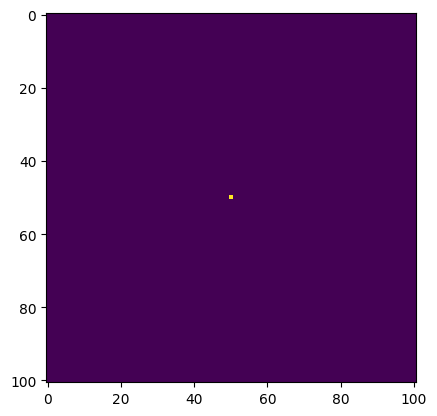

In [ ]:
size=101
rhostart=10.
x = np.linspace(0, size-1, size)
y = np.linspace(0, size-1, size)
xv, yv = np.meshgrid(x, y)
rho=np.zeros([size,size])
xstart=50
ystart=50
rho[x==xstart,y==ystart]=rhostart
plt.imshow(rho)
plt.show()

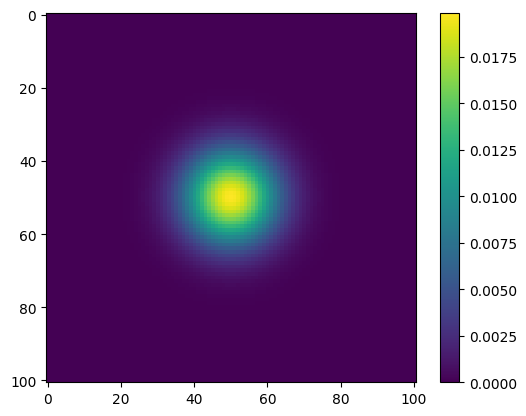

In [ ]:
N=200
for i in range(N):
    rho[1:-1,1:-1]=rho[1:-1,1:-1]+r*(rho[2:,1:-1]+rho[:-2,1:-1]+rho[1:-1,2:]+rho[1:-1,:-2]-4*rho[1:-1,1:-1])
plt.imshow(rho)
plt.colorbar()
plt.show()

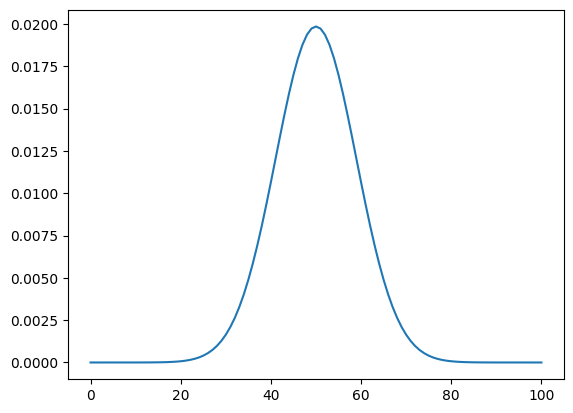

In [ ]:
plt.plot(rho[xstart,]) # slice

In [ ]:
print(rhostart, np.sum(rho)) # check: no particles lost

10.0 9.999999149157555


In [ ]:
np.sum(rho*dx*np.sqrt(((xv-xstart)**2 + (yv-ystart)**2)))/rhostart # average distance traveled

1.1212152130573738

In [ ]:
print(np.sqrt(4*D*N*dt)) # Theory: sqrt(2*dim*D*N*dt)

1.2649110640673518


## Part 2: Monte Carlo Method

In [ ]:
walkers=1000
xwalkers=np.zeros(walkers)
ywalkers=np.zeros(walkers)
for j in range(N):
    for i in range(walkers):
        throw=np.random.rand()
        if (0 < throw < 0.25):
            xwalkers[i]+=dx
        if (0.25 < throw < 0.5):
            xwalkers[i]-=dx
        if (0.5 < throw < 0.75):
            ywalkers[i]+=dx
        if (0.75 < throw < 1.0):
            ywalkers[i]-=dx

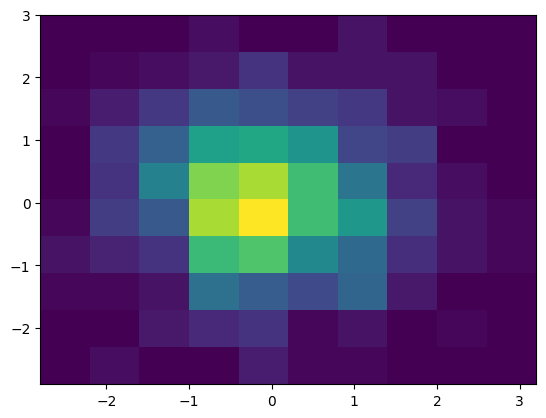

In [ ]:
plt.hist2d(xwalkers,ywalkers)
plt.show()

In [ ]:
np.sum(np.sqrt(((xwalkers)**2 + (ywalkers)**2)))/walkers

1.2264886119786325